In [345]:
from google.colab import drive


In [346]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [347]:
# Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [348]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
df = pd.read_csv('/content/drive/MyDrive/tcc/base_de_dados_tcc_tratada_v3.csv')
df

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,WIN,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,2015-2016_Bournemouth_Aston Villa,2015-2016,1,8/8/2015,NaN,Bournemouth,Aston Villa,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0
1,2015-2016_Chelsea_Swansea,2015-2016,1,8/8/2015,NaN,Chelsea,Swansea,2.0,2.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,2015-2016_Everton_Watford,2015-2016,1,8/8/2015,NaN,Everton,Watford,2.0,2.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,2015-2016_Leicester_Sunderland,2015-2016,1,8/8/2015,NaN,Leicester,Sunderland,4.0,2.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
4,2015-2016_Man United_Tottenham,2015-2016,1,8/8/2015,NaN,Man United,Tottenham,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2024_2025_Southampton_Everton,2024-2025,10,11/02/2024,15:00,Southampton,Everton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3515,2024_2025_Wolves Crystal_Palace,2024-2025,10,11/02/2024,15:00,Wolves,Crystal Palace,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3516,2024_2025_Tottenham Aston_Villa,2024-2025,10,11/02/2024,15:00,Tottenham,Aston Villa,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3517,2024_2025_Man United_Chelsea,2024-2025,10,11/02/2024,15:00,Man United,Chelsea,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
# Criando a coluna com o identificador do jogo (ID_PARTIDA)

df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns = {"index": "ID_PARTIDA"})
df["ID_PARTIDA"] = df.index + 1

In [351]:
def calcular_dupla_hipotese(odds_empate, odds_fora, overround=1.14):
    """
    Calcula as odds para a dupla hipótese (empate ou vitória fora),
    ajustadas pela margem de lucro (overround) da casa de apostas.

    Parameters:
    odds_empate (float): odds para empate.
    odds_fora (float): odds para vitória fora.
    overround (float): fator de overround (por exemplo, 1.07 para uma margem de 7%).

    Returns:
    float: odds ajustadas para "empate ou vitória fora".
    """
    # Calcular as probabilidades implícitas
    prob_empate = 1 / odds_empate
    prob_fora = 1 / odds_fora

    # Calcular a probabilidade combinada sem ajustar o overround
    prob_fora_ou_empate = prob_empate + prob_fora - (prob_empate * prob_fora)

    # Ajustar a probabilidade combinada com a margem de lucro (overround)
    prob_fora_ou_empate_ajustada = prob_fora_ou_empate * overround

    # Converter a probabilidade ajustada em odds
    odds_fora_ou_empate = 1 / prob_fora_ou_empate_ajustada

    return odds_fora_ou_empate


In [352]:
df['DRAW_OR_AWAY'] = None

for i in range(len(df)):
    empate = df.loc[i, "X_BET"]
    fora = df.loc[i, "A_BET"]

    df.loc[i, 'DRAW_OR_AWAY'] = calcular_dupla_hipotese(empate, fora)

df.DRAW_OR_AWAY

,DRAW_OR_AWAY
0,1.913876
1,3.216374
2,2.239975
3,1.946392
4,2.339181
...,...
3514,1.550877
3515,1.578947
3516,1.870888
3517,1.521661


In [353]:
# Função para calcular a média dos últimos 5 chutes para cada time
def calculate_average_shots(team, df, current_date, home_column, away_column, is_home):
    if is_home:
        # Selecionar jogos onde o time é "Home"
        home_games = df[(df['HomeTeam'] == team) & (df['Date'] < current_date)][['Date', home_column]]
        # Renomear a coluna para Shots
        home_games.columns = ['Date', 'Shots']
        return home_games.sort_values(by='Date', ascending=False).head(5)['Shots'].mean() if not home_games.empty else 0
    else:
        # Selecionar jogos onde o time é "Away"
        away_games = df[(df['AwayTeam'] == team) & (df['Date'] < current_date)][['Date', away_column]]
        # Renomear a coluna para Shots
        away_games.columns = ['Date', 'Shots']
        return away_games.sort_values(by='Date', ascending=False).head(5)['Shots'].mean() if not away_games.empty else 0

# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Inicializar listas para armazenar os resultados
avg_home_shots = []
avg_away_shots = []

# Iterar sobre o DataFrame para calcular as médias de chutes
for index, row in df.iterrows():
    team_home = row['HomeTeam']
    team_away = row['AwayTeam']
    current_date = row['Date']

    # Calcular a média dos chutes para o time da casa (usando HomeTeamShots)
    avg_home = calculate_average_shots(team_home, df, current_date, 'HomeTeamShots', 'AwayTeamShots', is_home=True)
    # Calcular a média dos chutes para o time visitante (usando AwayTeamShots)
    avg_away = calculate_average_shots(team_away, df, current_date, 'HomeTeamShots', 'AwayTeamShots', is_home=False)

    # Armazenar os resultados
    avg_home_shots.append(avg_home)
    avg_away_shots.append(avg_away)

# Adicionar as colunas de médias ao DataFrame original
df['Avg_home_shots'] = avg_home_shots
df['Avg_away_shots'] = avg_away_shots

# Exibir os resultados
print(df[['Date', 'HomeTeam', 'AwayTeam', 'Avg_home_shots', 'Avg_away_shots']])


           Date     HomeTeam        AwayTeam  Avg_home_shots  Avg_away_shots
0    2015-08-08  Bournemouth     Aston Villa             0.0             0.0
1    2015-08-08      Chelsea         Swansea             0.0             0.0
2    2015-08-08      Everton         Watford             0.0             0.0
3    2015-08-08    Leicester      Sunderland             0.0             0.0
4    2015-08-08   Man United       Tottenham             0.0             0.0
...         ...          ...             ...             ...             ...
3514 2024-11-02  Southampton         Everton            10.2             9.6
3515 2024-11-02       Wolves  Crystal Palace             9.6            14.6
3516 2024-11-02    Tottenham     Aston Villa            16.6            10.8
3517 2024-11-02   Man United         Chelsea            14.6            11.2
3518 2024-11-02       Fulham       Brentford            14.4             8.2

[3519 rows x 5 columns]


In [354]:
# Função para calcular a média dos últimos 5 escanteios para cada time
def calculate_average_corners(team, df, current_date, home_column, away_column, is_home):
    if is_home:
        # Selecionar jogos onde o time é "Home"
        home_games = df[(df['HomeTeam'] == team) & (df['Date'] < current_date)][['Date', home_column]]
        # Renomear a coluna para Shots
        home_games.columns = ['Date', 'Corners']
        return home_games.sort_values(by='Date', ascending=False).head(5)['Corners'].mean() if not home_games.empty else 0
    else:
        # Selecionar jogos onde o time é "Away"
        away_games = df[(df['AwayTeam'] == team) & (df['Date'] < current_date)][['Date', away_column]]
        # Renomear a coluna para Corners
        away_games.columns = ['Date', 'Corners']
        return away_games.sort_values(by='Date', ascending=False).head(5)['Corners'].mean() if not away_games.empty else 0

# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Inicializar listas para armazenar os resultados
avg_home_corners = []
avg_away_corners = []

# Iterar sobre o DataFrame para calcular as médias de escanteios
for index, row in df.iterrows():
    team_home = row['HomeTeam']
    team_away = row['AwayTeam']
    current_date = row['Date']

    # Calcular a média dos escanteios para o time da casa (usando HomeTeamCorners)
    avg_home = calculate_average_corners(team_home, df, current_date, 'HomeTeamCorners', 'AwayTeamCorners', is_home=True)
    # Calcular a média dos escanteios para o time visitante (usando AwayTeamCorners)
    avg_away = calculate_average_corners(team_away, df, current_date, 'HomeTeamCorners', 'AwayTeamCorners', is_home=False)

    # Armazenar os resultados
    avg_home_corners.append(avg_home)
    avg_away_corners.append(avg_away)

# Adicionar as colunas de médias ao DataFrame original
df['Avg_home_corners'] = avg_home_corners
df['Avg_away_corners'] = avg_away_corners

# Exibir os resultados
print(df[['Date', 'HomeTeam', 'AwayTeam', 'Avg_home_corners', 'Avg_away_corners']])

           Date     HomeTeam        AwayTeam  Avg_home_corners  \
0    2015-08-08  Bournemouth     Aston Villa               0.0   
1    2015-08-08      Chelsea         Swansea               0.0   
2    2015-08-08      Everton         Watford               0.0   
3    2015-08-08    Leicester      Sunderland               0.0   
4    2015-08-08   Man United       Tottenham               0.0   
...         ...          ...             ...               ...   
3514 2024-11-02  Southampton         Everton               3.6   
3515 2024-11-02       Wolves  Crystal Palace               4.0   
3516 2024-11-02    Tottenham     Aston Villa               9.6   
3517 2024-11-02   Man United         Chelsea               7.0   
3518 2024-11-02       Fulham       Brentford               4.6   

      Avg_away_corners  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
3514               3.2  
3515   

In [355]:
# Função para calcular a média dos últimos 5 chutes ao alvo para cada time
def calculate_average_shots_on_target(team, df, current_date, home_column, away_column, is_home):
    if is_home:
        # Selecionar jogos onde o time é "Home"
        home_games = df[(df['HomeTeam'] == team) & (df['Date'] < current_date)][['Date', home_column]]
        # Renomear a coluna para Shots
        home_games.columns = ['Date', 'ShotsOnTarget']
        return home_games.sort_values(by='Date', ascending=False).head(5)['ShotsOnTarget'].mean() if not home_games.empty else 0
    else:
        # Selecionar jogos onde o time é "Away"
        away_games = df[(df['AwayTeam'] == team) & (df['Date'] < current_date)][['Date', away_column]]
        # Renomear a coluna para ShotsOnTarget
        away_games.columns = ['Date', 'ShotsOnTarget']
        return away_games.sort_values(by='Date', ascending=False).head(5)['ShotsOnTarget'].mean() if not away_games.empty else 0

# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Inicializar listas para armazenar os resultados
avg_home_shots_on_target = []
avg_away_shots_on_target = []

# Iterar sobre o DataFrame para calcular as médias de chutes ao alvo
for index, row in df.iterrows():
    team_home = row['HomeTeam']
    team_away = row['AwayTeam']
    current_date = row['Date']

    # Calcular a média dos chutes ao alvo para o time da casa (usando HomeTeamShotsOnTarget)
    avg_home = calculate_average_shots_on_target(team_home, df, current_date, 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', is_home=True)
    # Calcular a média dos chutes ao alvo para o time visitante (usando AwayTeamShotsOnTarget)
    avg_away = calculate_average_shots_on_target(team_away, df, current_date, 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', is_home=False)

    # Armazenar os resultados
    avg_home_shots_on_target.append(avg_home)
    avg_away_shots_on_target.append(avg_away)

# Adicionar as colunas de médias ao DataFrame original
df['Avg_home_shots_on_target'] = avg_home_shots_on_target
df['Avg_away_shots_on_target'] = avg_away_shots_on_target

# Exibir os resultados
print(df[['Date', 'HomeTeam', 'AwayTeam', 'Avg_home_shots_on_target', 'Avg_away_shots_on_target']])

           Date     HomeTeam        AwayTeam  Avg_home_shots_on_target  \
0    2015-08-08  Bournemouth     Aston Villa                       0.0   
1    2015-08-08      Chelsea         Swansea                       0.0   
2    2015-08-08      Everton         Watford                       0.0   
3    2015-08-08    Leicester      Sunderland                       0.0   
4    2015-08-08   Man United       Tottenham                       0.0   
...         ...          ...             ...                       ...   
3514 2024-11-02  Southampton         Everton                       5.0   
3515 2024-11-02       Wolves  Crystal Palace                       4.2   
3516 2024-11-02    Tottenham     Aston Villa                       6.8   
3517 2024-11-02   Man United         Chelsea                       5.8   
3518 2024-11-02       Fulham       Brentford                       5.4   

      Avg_away_shots_on_target  
0                          0.0  
1                          0.0  
2           

In [356]:
# Alterando os resultados de string (Draw = empate, Home = vitória do time da casa, Away = vitória do time visitante), para
# inteiro (0 = empate, 1 = vitória do time da casa, 2 = vitória do time visitante)
for i in range(0,len(df)):
    if pd.notna(df["WIN"][i]):
      if df["WIN"][i] == "H":
          df.at[i,"WIN"] = '0'
      if df["WIN"][i] == "D":
          df.at[i,"WIN"] = '1'
      if df["WIN"][i] == "A":
          df.at[i,"WIN"] = '1'

df["WIN"] = pd.to_numeric(df["WIN"], errors='coerce').fillna(-1).astype(int)

Total de jogos:  3519
Total de colunas:  51
Total de jogos ganhos em casa:  1573
Total de jogos ganhos pelo visitante:  1936
Percentual de jogos ganhos em casa: 44.70%


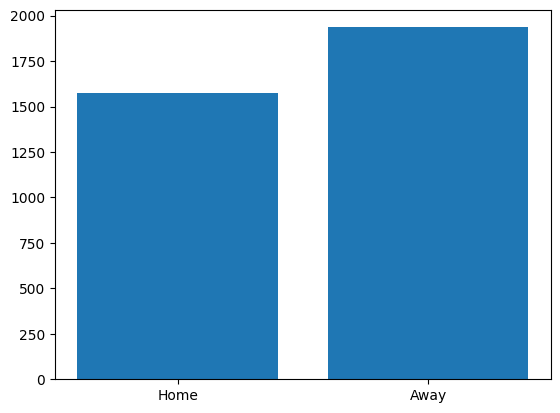

In [357]:
# Capturando a quantidade de partidas e colunas da base
matches = df.shape[0]
features = df.shape[1]

# Separando as vitórias do time da casa, visitante e empate
home_win = len(df[df.WIN==0])
away_win = len(df[df.WIN==1])
val = [home_win, away_win]

# Percentual de vitórias do time da casa
win_rate = (float(home_win)/(matches)) *100

# Mostrando na tela os resultados em texto e gráfico
print ('Total de jogos: ', matches)
print ('Total de colunas: ', features)
print ('Total de jogos ganhos em casa: ', home_win)
print ('Total de jogos ganhos pelo visitante: ', away_win)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))
x = np.arange(2)
plt.bar(x, val)
plt.xticks(x, ('Home', 'Away'))
plt.show()

In [358]:
df

,ID_PARTIDA,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,...,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,DRAW_OR_AWAY,Avg_home_shots,Avg_away_shots,Avg_home_corners,Avg_away_corners,Avg_home_shots_on_target,Avg_away_shots_on_target
0,1,2015-2016_Bournemouth_Aston Villa,2015-2016,1,2015-08-08,NaN,Bournemouth,Aston Villa,0.0,1.0,...,NaN,0.0,3.0,1.913876,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2015-2016_Chelsea_Swansea,2015-2016,1,2015-08-08,NaN,Chelsea,Swansea,2.0,2.0,...,NaN,1.0,1.0,3.216374,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2015-2016_Everton_Watford,2015-2016,1,2015-08-08,NaN,Everton,Watford,2.0,2.0,...,NaN,1.0,1.0,2.239975,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2015-2016_Leicester_Sunderland,2015-2016,1,2015-08-08,NaN,Leicester,Sunderland,4.0,2.0,...,NaN,3.0,0.0,1.946392,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2015-2016_Man United_Tottenham,2015-2016,1,2015-08-08,NaN,Man United,Tottenham,1.0,0.0,...,NaN,3.0,0.0,2.339181,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,3515,2024_2025_Southampton_Everton,2024-2025,10,2024-11-02,15:00,Southampton,Everton,NaN,NaN,...,NaN,NaN,NaN,1.550877,10.2,9.6,3.6,3.2,5.0,3.6
3515,3516,2024_2025_Wolves Crystal_Palace,2024-2025,10,2024-11-02,15:00,Wolves,Crystal Palace,NaN,NaN,...,NaN,NaN,NaN,1.578947,9.6,14.6,4.0,5.8,4.2,4.8
3516,3517,2024_2025_Tottenham Aston_Villa,2024-2025,10,2024-11-02,15:00,Tottenham,Aston Villa,NaN,NaN,...,NaN,NaN,NaN,1.870888,16.6,10.8,9.6,4.4,6.8,3.6
3517,3518,2024_2025_Man United_Chelsea,2024-2025,10,2024-11-02,15:00,Man United,Chelsea,NaN,NaN,...,NaN,NaN,NaN,1.521661,14.6,11.2,7.0,4.6,5.8,4.4


In [359]:
features = df[['H_BET', 'DRAW_OR_AWAY', 'Avg_home_shots', 'Avg_away_shots',	'Avg_home_corners',	'Avg_away_corners',	'Avg_home_shots_on_target',	'Avg_away_shots_on_target']]
labels = df['WIN']


print('Features')
print(features.head())
print('=====================')
print('Labels')
print(labels.head())

scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ',features_scale.shape)
print(features_scale)

# Separação de treino e teste
# Treino [:2792]     representa 80% dos dados
# Teste [2792:3141]      representa 10% dos dados
# Previsão [2792:3141]     representa 10% dos dados

X_train = features_scale[:2808]
X_test = features_scale[2808:3159]
y_train = labels[:2808]
y_test = labels[2808:3159]

X_train_3_seasons = features_scale[2662:3344] # primeira linha do filtro + (0.8 * qtd de registros)
X_test_3_seasons = features_scale[3344:3429] # ponto de partida dos testes + (0.1 * qtd de registros)
y_train_3_seasons = labels[2662:3344]
y_test_3_seasons = labels[3344:3429]

X_train_5_seasons = features_scale[1902:3198]
X_test_5_seasons = features_scale[3198:3360]
y_train_5_seasons = labels[1902:3198]
y_test_5_seasons = labels[3198:3360]

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

Features
   H_BET DRAW_OR_AWAY  Avg_home_shots  Avg_away_shots  Avg_home_corners  \
0   2.00     1.913876             0.0             0.0               0.0   
1   1.36     3.216374             0.0             0.0               0.0   
2   1.70     2.239975             0.0             0.0               0.0   
3   1.95     1.946392             0.0             0.0               0.0   
4   1.65     2.339181             0.0             0.0               0.0   

   Avg_away_corners  Avg_home_shots_on_target  Avg_away_shots_on_target  
0               0.0                       0.0                       0.0  
1               0.0                       0.0                       0.0  
2               0.0                       0.0                       0.0  
3               0.0                       0.0                       0.0  
4               0.0                       0.0                       0.0  
Labels
0    1
1    1
2    1
3    0
4    0
Name: WIN, dtype: int64
Features:  (3519, 8)
[[0.04284

In [360]:
# Rodando o modelo de Regressão Logística em sua versão multinomial

clf_LR = LogisticRegression(multi_class = 'multinomial', max_iter = 2000)
# clf_LR.fit(X_train, y_train)
# pred = clf_LR.predict(X_test)
# clf_LR.fit(X_train_2024, y_train_2024)
# pred = clf_LR.predict(X_test_2024)
clf_LR.fit(X_train_5_seasons, y_train_5_seasons)
pred = clf_LR.predict(X_test_5_seasons)
# clf_LR.fit(X_train_3_seasons, y_train_3_seasons)
# pred = clf_LR.predict(X_test_3_seasons)

# lr_acc = accuracy_score(y_test, pred)
# f1 = f1_score(y_test, pred, average = 'macro')
# lr_acc = accuracy_score(y_test_2024, pred)
# f1 = f1_score(y_test_2024, pred, average = 'macro')
lr_acc = accuracy_score(y_test_5_seasons, pred)
f1 = f1_score(y_test_5_seasons, pred, average = 'macro')
# lr_acc = accuracy_score(y_test_3_seasons, pred)
# precision = precision_score(y_test_3_seasons, pred, average = 'macro')
# f1 = f1_score(y_test_3_seasons, pred, average = 'macro')

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))
# print('Precisão: {:.2f}%'.format(precision*100))
print('F1 Score: {:.2f}%'.format(f1*100))

Regressão Logística

Acurácia: 66.67%
F1 Score: 65.92%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [361]:
# Rodando o modelo de Árvore de Decisão

clf_DT = DecisionTreeClassifier(random_state=42)
# clf_DT.fit(X_train, y_train)
# pred = clf_DT.predict(X_test)
# clf_DT.fit(X_train_2024, y_train_2024)
# pred = clf_DT.predict(X_test_2024)
clf_DT.fit(X_train_5_seasons, y_train_5_seasons)
pred = clf_DT.predict(X_test_5_seasons)
# clf_DT.fit(X_train_3_seasons, y_train_3_seasons)
# pred = clf_DT.predict(X_test_3_seasons)

# dt_acc = accuracy_score(y_test, pred)
# f1 = f1_score(y_test, pred, average = 'macro')
# dt_acc = accuracy_score(y_test_2024, pred)
# f1 = f1_score(y_test_2024, pred, average = 'macro')
dt_acc = accuracy_score(y_test_5_seasons, pred)
f1 = f1_score(y_test_5_seasons, pred, average = 'macro')
# dt_acc = accuracy_score(y_test_3_seasons, pred)
# f1 = f1_score(y_test_3_seasons, pred, average = 'macro')
# precision = precision_score(y_test_3_seasons, pred, average = 'macro')

print('Árvore de Decisão')
print('')
print('Acurácia: {:.2f}%'.format(dt_acc*100))
# print('Precisão: {:.2f}%'.format(precision*100))
print('F1 Score: {:.2f}%'.format(f1*100))

Árvore de Decisão

Acurácia: 53.09%
F1 Score: 52.91%


In [362]:
# Rodando o modelo de Naive Bayes

clf_NB = GaussianNB()
# clf_NB.fit(X_train, y_train)
# pred = clf_NB.predict(X_test)
# clf_NB.fit(X_train_2024, y_train_2024)
# pred = clf_NB.predict(X_test_2024)
clf_NB.fit(X_train_5_seasons, y_train_5_seasons)
pred = clf_NB.predict(X_test_5_seasons)
# clf_NB.fit(X_train_3_seasons, y_train_3_seasons)
# pred = clf_NB.predict(X_test_3_seasons)

# nb_acc = accuracy_score(y_test, pred)
# f1 = f1_score(y_test, pred, average = 'macro')
# nb_acc = accuracy_score(y_test_2024, pred)
# f1 = f1_score(y_test_2024, pred, average = 'macro')
nb_acc = accuracy_score(y_test_5_seasons, pred)
f1 = f1_score(y_test_5_seasons, pred, average = 'macro')
# nb_acc = accuracy_score(y_test_3_seasons, pred)
# f1 = f1_score(y_test_3_seasons, pred, average = 'macro')
# precision = precision_score(y_test_3_seasons, pred, average = 'macro')

print('Naive Bayes')
print('')
print('Acurácia Naive Bayes: {:.2f}%'.format(nb_acc*100))
# print('Precisão: {:.2f}%'.format(precision*100))
print('F1 Score: {:.2f}%'.format(f1*100))

Naive Bayes

Acurácia Naive Bayes: 65.43%
F1 Score: 65.41%


In [363]:
# n° neuronios escondidos = 2/3 x tamanho da camada de entrada + tamanho da camada de saida
# Inicializando o classificador de Rede Neural com 7 neurônios na camada escondida
clf_NN = MLPClassifier(hidden_layer_sizes=(7,), max_iter=2000, random_state=42)

# Treinando o modelo
# clf_NN.fit(X_train, y_train)
# clf_NN.fit(X_train_2024, y_train_2024)
clf_NN.fit(X_train_5_seasons, y_train_5_seasons)
# clf_NN.fit(X_train_3_seasons, y_train_3_seasons)

# Fazendo previsões
# pred_nn = clf_NN.predict(X_test)
# pred_nn = clf_NN.predict(X_test_2024)
pred_nn = clf_NN.predict(X_test_5_seasons)
# pred_nn = clf_NN.predict(X_test_3_seasons)

# Calculando Acurácia e F1-Score
# nn_acc = accuracy_score(y_test, pred_nn)
# f1_nn = f1_score(y_test, pred_nn, average='macro', pos_label=1)
# nn_acc = accuracy_score(y_test_2024, pred_nn)
# f1_nn = f1_score(y_test_2024, pred_nn, average='macro', pos_label=1)
nn_acc = accuracy_score(y_test_5_seasons, pred_nn)
f1_nn = f1_score(y_test_5_seasons, pred_nn, average='macro', pos_label=1)
# nn_acc = accuracy_score(y_test_3_seasons, pred_nn)
# f1_nn = f1_score(y_test_3_seasons, pred_nn, average='macro', pos_label=1)
# precision = precision_score(y_test_3_seasons, pred, average = 'macro')

# Exibindo os resultados
print('Rede Neural')
print('')
print('Acurácia: {:.2f}%'.format(nn_acc * 100))
print('F1 Score: {:.2f}%'.format(f1_nn * 100))
# print('Precisão: {:.2f}%'.format(precision*100))

# Fazendo previsões de probabilidade
# pred_proba = clf_NN.predict_proba(X_test)
# pred_proba = clf_NN.predict_proba(X_test_2024)
pred_proba = clf_NN.predict_proba(X_test_5_seasons)
# pred_proba = clf_NN.predict_proba(X_test_3_seasons)

last_10_proba = pred_proba[-10:]
# Exibindo as probabilidades previstas
print('\nProbabilidades previstas:')
for i, prob in enumerate(last_10_proba):
    index = len(df) - 10 + i  # Encontrar o índice correspondente em df
    print(df['HomeTeam'][index], 'x', df['AwayTeam'][index], ':', prob, df['Date'][index])


Rede Neural

Acurácia: 70.37%
F1 Score: 69.91%

Probabilidades previstas:
Bournemouth x Man City : [0.26323402 0.73676598] 2024-11-02 00:00:00
Newcastle x Arsenal : [0.17286202 0.82713798] 2024-11-02 00:00:00
Liverpool x Brighton : [0.63119967 0.36880033] 2024-11-02 00:00:00
Ipswich x Leicester : [0.42255612 0.57744388] 2024-11-02 00:00:00
Nott'm Forest x West Ham : [0.59716127 0.40283873] 2024-11-02 00:00:00
Southampton x Everton : [0.28018612 0.71981388] 2024-11-02 00:00:00
Wolves x Crystal Palace : [0.93700008 0.06299992] 2024-11-02 00:00:00
Tottenham x Aston Villa : [0.42619899 0.57380101] 2024-11-02 00:00:00
Man United x Chelsea : [0.49656426 0.50343574] 2024-11-02 00:00:00
Fulham x Brentford : [0.88445369 0.11554631] 2024-11-02 00:00:00


In [364]:
previsao = features_scale[3158:]

game_id_full = df['ID_PARTIDA']
game_id_prev = game_id_full[3158:]

res_full = df['WIN']
res_prev = res_full[3158:]

pred = clf_NN.predict(previsao)

df = pd.DataFrame({'Real': res_prev, 'Previsão': pred, 'ID_PARTIDA': game_id_prev})

print(df)

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#confusion Matrix

df_filtered = df[df['Real'] != -1]

cf_matrix = pd.crosstab(df_filtered['Real'], df_filtered['Previsão'], rownames = ['Real'] , colnames = ['Previsão'])

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = 'g')